<a href="https://colab.research.google.com/github/Madhur6869/Churn-prediction/blob/main/Mini_project_Churn_pred_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 6.5 s (started: 2022-04-20 10:05:38 +00:00)


In [ ]:
df=pd.read_csv('/content/bank_data.csv')

time: 28 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


time: 18.9 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
time: 23.8 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
#We can see that some columns such as RowNumber, CustomerId and Surname are irrelevant for our prdeiction
df_new = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

time: 3.8 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
time: 16.4 ms (started: 2022-04-20 10:05:45 +00:00)


We can see that there are no null values, hence modification is not required

In [ ]:
print(df_new.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
time: 5.2 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


time: 19.9 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
print("Geography:")
print(df_new['Geography'].nunique())
print(df_new['Geography'].unique())
print()
print("Gender:")
print(df_new['Gender'].nunique())
print(df_new['Gender'].unique())

Geography:
3
['France' 'Spain' 'Germany']

Gender:
2
['Female' 'Male']
time: 12.4 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

df_new = dummies('Geography',df_new)
df_new = dummies('Gender',df_new)

time: 25.6 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df_new.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


time: 18.3 ms (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
df_new.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


time: 35.4 ms (started: 2022-04-20 10:05:45 +00:00)


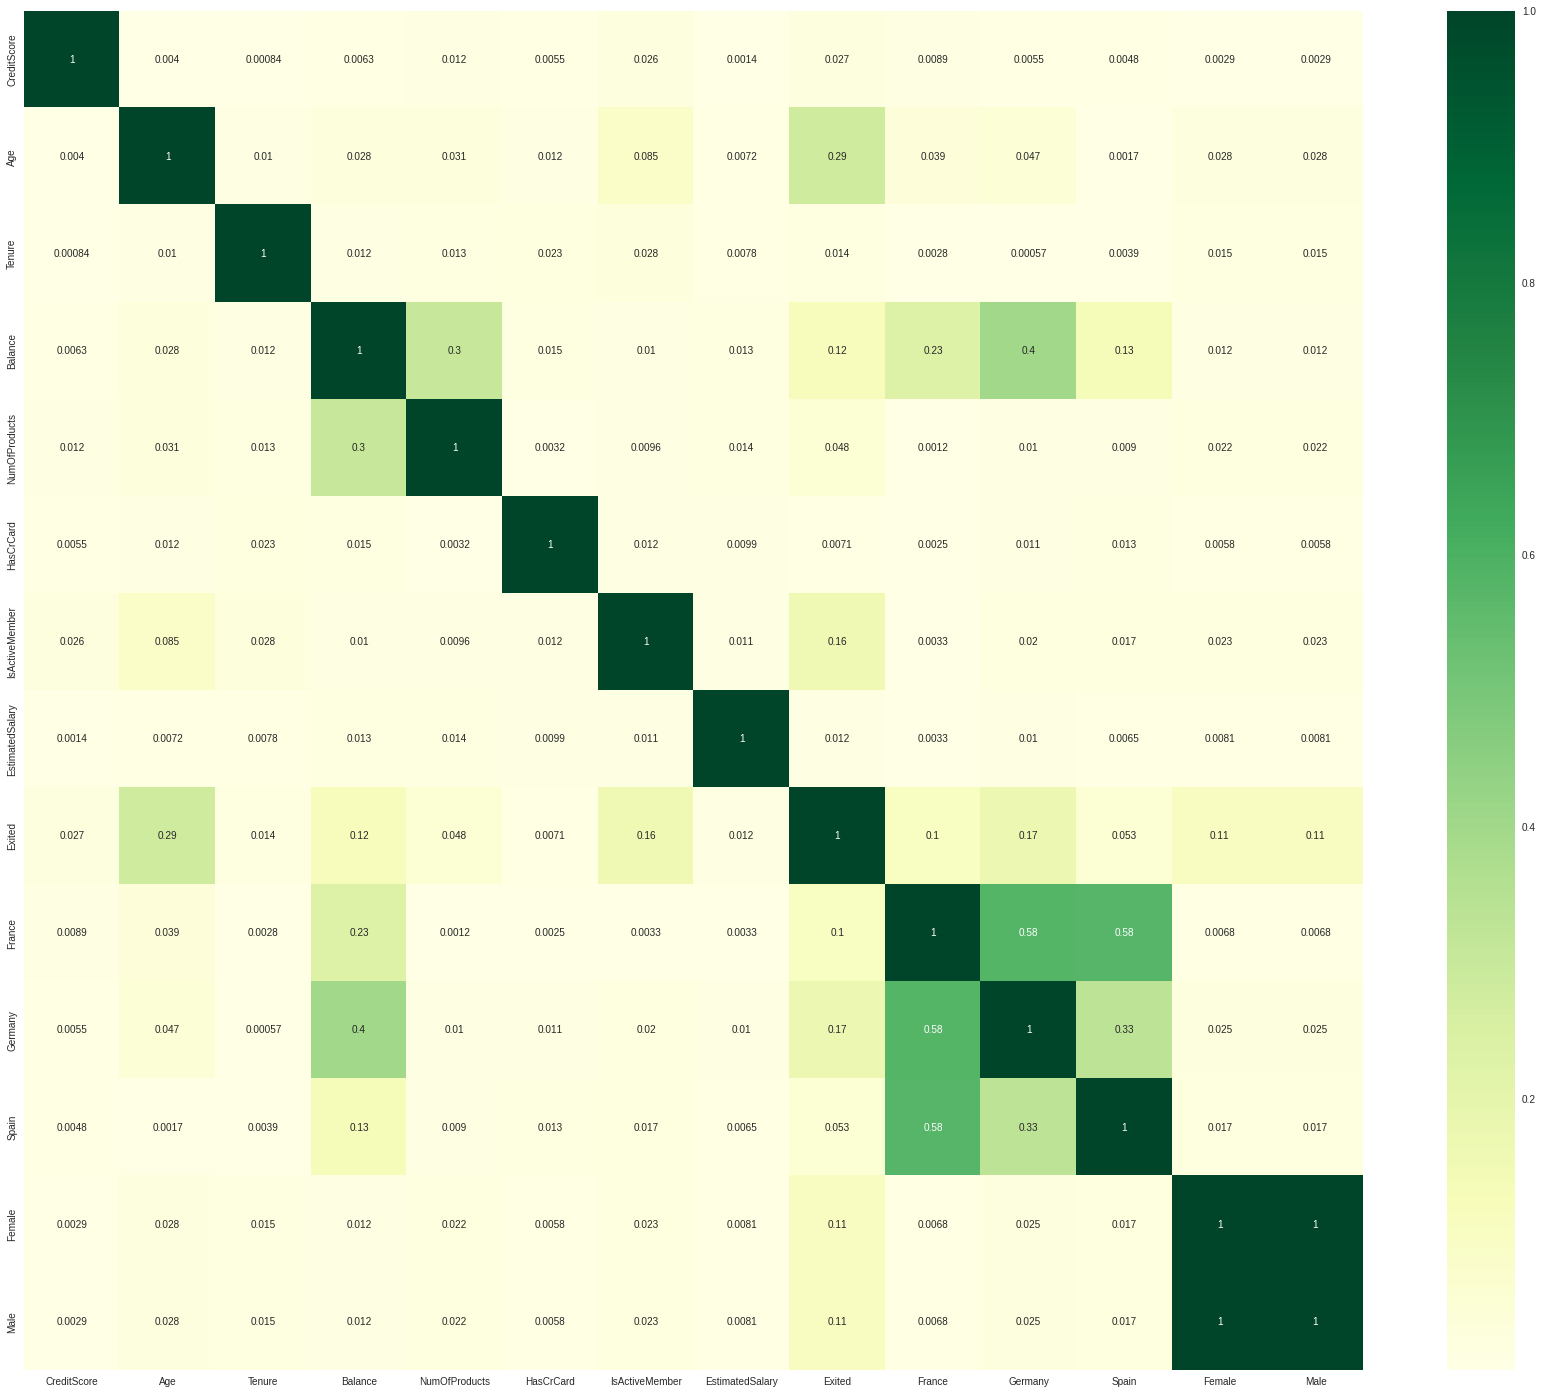

time: 1.32 s (started: 2022-04-20 10:05:45 +00:00)


In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(abs(df_new.corr()), annot = True, cmap="YlGn")
plt.show()

In [ ]:
Y=df_new['Exited']
X = df_new.drop(['Exited','HasCrCard','Tenure','EstimatedSalary','CreditScore','EstimatedSalary','NumOfProducts'], axis = 1)
num_cols = X[['Age','Balance',]]

time: 12.2 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
from sklearn import preprocessing
names=num_cols.columns.values
num_cols = preprocessing.normalize(num_cols,axis=0)
num_cols = pd.DataFrame(num_cols, columns=names)
num_cols.head()

,Age,Balance
0,0.010419,0.000000
1,0.010171,0.008491
2,0.010419,0.016175
3,0.009675,0.000000
4,0.010667,0.012715


time: 23.9 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
X[['Age','Balance']]=num_cols
X.head()

,Age,Balance,IsActiveMember,France,Germany,Spain,Female,Male
0,0.010419,0.000000,1,1,0,0,1,0
1,0.010171,0.008491,1,0,0,1,1,0
2,0.010419,0.016175,0,1,0,0,1,0
3,0.009675,0.000000,0,1,0,0,1,0
4,0.010667,0.012715,1,0,0,1,1,0


time: 21.7 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
#Using 75% for training and 25% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y)

time: 13.4 ms (started: 2022-04-20 10:05:46 +00:00)


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

time: 41.5 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Confusion Matrix Decision Tree\n")
print(confusion_matrix(Y_test, predictions))

print("\nClassification Report Decision Tree\n")
print(classification_report(Y_test, predictions))

Confusion Matrix Decision Tree

[[1769  222]
 [ 318  191]]

Classification Report Decision Tree

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1991
           1       0.46      0.38      0.41       509

    accuracy                           0.78      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.77      0.78      0.78      2500

time: 34.7 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
#fig = plt.figure(figsize=(25,20))
#tree.plot_tree(model)

time: 999 µs (started: 2022-04-20 10:05:46 +00:00)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier( n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)#random_state=42
classifier_rf.fit(X_train, Y_train)
predictions_rf = classifier_rf.predict(X_test)

time: 843 ms (started: 2022-04-20 10:05:46 +00:00)


In [ ]:
print("Confusion Matrix for RF\n")
print(confusion_matrix(Y_test, predictions_rf))

print("\nClassification Report RF\n")
print(classification_report(Y_test, predictions_rf))

Confusion Matrix for RF

[[1941   50]
 [ 377  132]]

Classification Report RF

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1991
           1       0.73      0.26      0.38       509

    accuracy                           0.83      2500
   macro avg       0.78      0.62      0.64      2500
weighted avg       0.81      0.83      0.80      2500

time: 21.3 ms (started: 2022-04-20 10:05:47 +00:00)


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ab= AdaBoostClassifier()#random_state=96
classifier_ab.fit(X_train,Y_train)
predictions_ab = classifier_ab.predict(X_test)

time: 368 ms (started: 2022-04-20 10:05:47 +00:00)


In [ ]:
classifier_ab.score(X_train,Y_train)

0.8352

time: 93.6 ms (started: 2022-04-20 10:05:48 +00:00)


In [ ]:
classifier_ab.score(X_test,Y_test)

0.8352

time: 44 ms (started: 2022-04-20 10:05:48 +00:00)


In [ ]:
print("Confusion Matrix for AdaBoost\n")
print(confusion_matrix(Y_test, predictions_ab))

print("\nClassification Report AdaBoost\n")
print(classification_report(Y_test, predictions_ab))

Confusion Matrix for AdaBoost

[[1914   77]
 [ 335  174]]

Classification Report AdaBoost

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1991
           1       0.69      0.34      0.46       509

    accuracy                           0.84      2500
   macro avg       0.77      0.65      0.68      2500
weighted avg       0.82      0.84      0.81      2500

time: 29.3 ms (started: 2022-04-20 10:05:48 +00:00)


# Comparing the models

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores

auc_score_rf = roc_auc_score(Y_test, predictions_rf)
auc_score_ab = roc_auc_score(Y_test, predictions_ab)
auc_score_dt = roc_auc_score(Y_test, predictions)


print( auc_score_rf, auc_score_ab,auc_score_dt)

0.6171095075186078 0.651586362600267 0.6318719108285912
time: 22.3 ms (started: 2022-04-20 10:05:48 +00:00)


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr_dt, tpr_dt, thresh_dt = roc_curve(Y_test, predictions, pos_label=1)
fpr_rf, tpr_rf, thresh_rf = roc_curve(Y_test, predictions_rf, pos_label=1)
fpr_ab, tpr_ab, thresh_ab = roc_curve(Y_test, predictions_ab, pos_label=1)


time: 8.71 ms (started: 2022-04-20 10:05:48 +00:00)


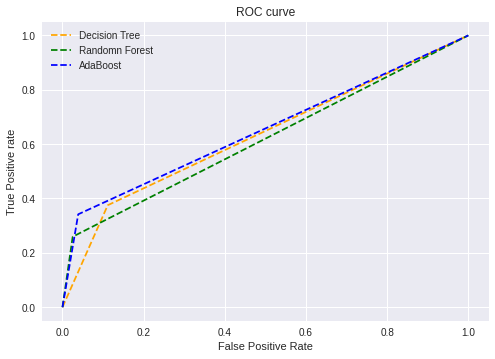

time: 1.05 s (started: 2022-04-20 10:05:48 +00:00)


In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dt, tpr_dt, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, linestyle='--',color='green', label='Randomn Forest')
plt.plot(fpr_ab, tpr_ab, linestyle='--', color='blue', label='AdaBoost')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();